<a id = 'top'></a>

# A quick-start guide to Keras
  * A. [What is Keras?](#introToKeras) 
  * B. [Basic Operations](#kerasBasicOps)  
      * 1. [Sequential interface](#sequentialInterface)
      * 2. [Creating a model](#createModel)
      * 3. [Compiling a model](#compileModel)
      * 4. [Training a model](#trainModel)
      * 5. [Saving a model](#saveModel)
      * 6. [Reloading a model](#reloadModel)
  * C. [Defining your model inside a function to add flexibility](#functionWrapper)

[Return to Top](#top)
<a id = 'introToKeras'></a>
## A. What is Keras?

[Keras](https://en.wikipedia.org/wiki/Keras) is a front-end interface to Tensorflow.  Keras has its own [documentation](https://keras.io/about/) and is also well-documented in [tensorflow keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras).  

Using the Keras interface greatly simplifies the task of constructing, training and using tensorflow models.  In this notebook we'll build and train a basic fully-connected neural net and learn some of the important operations available within Keras.  We'll use the [sequential-model syntax](https://keras.io/guides/sequential_model/), which is useful when becoming familiar with Keras and appropriate for models where each layer has a single output feeding sequentially to the next layer.  

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.8.0-rc0


[Return to Top](#top)
<a id = 'kerasBasicOps'></a>
## B. Basic Operations in Keras

1. Construct the model graph from model input, model layers
2. Build the model (from input, output of the graph)
3. Compile the model with optimizer, metric set, loss function
4. Fit the model / evaluate the model
5. Save the model and re-use the model

[Return to Top](#top)
<a id = 'sequentialInterface'></a>
### B1. Sequential interface

[Return to Top](#top)
<a id = 'createModel'></a>
### B2. Creating a model

In [2]:
hidden_units = 200
model = keras.Sequential(
    [keras.Input(shape=(2,)),
     keras.layers.Dense(200, activation="relu", name="h1_layer"),
     keras.layers.Dense(100, activation="relu", name="h2_layer"),
     keras.layers.Dense(2, activation="sigmoid", name="output_layer"),
    ]
)

2022-02-11 08:21:01.183803: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[Return to Top](#top)
<a id = 'compileModel'></a>
### B3. Compiling a model

In [5]:
# Define loss function, optimizer, and accuracy
# Here we're using some basic loss, optimizer, metrics provided by Keras, all of which use reasonable defaults.

# However if you want to adjust things like learning rate you'll want to use the full Keras functional version of these to have ability to change
# ... the arguments from their default values.

loss = "sparse_categorical_crossentropy"    # Using sparse crossentropy when your class values are defined by unique labels.  Alternatively, using
#                                             ...categorical_crossentropy requires your labels to be in one-hot vector format.
optimizer = "adam"       # adam is an optimizer we'll use a lot
metrics = ["sparse_categorical_accuracy"] # This is a better accuracy metric to use
# ...as there is a bug in "accuracy" metric preventing re-loaded model from calculating 
# ...correct accuracy

model.compile(loss = loss, optimizer = optimizer, metrics = metrics)

In [6]:
# Always good to display your model and make sure its dimensions are what you expect
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1_layer (Dense)            (None, 200)               600       
                                                                 
 h2_layer (Dense)            (None, 100)               20100     
                                                                 
 output_layer (Dense)        (None, 2)                 202       
                                                                 
Total params: 20,902
Trainable params: 20,902
Non-trainable params: 0
_________________________________________________________________


In [6]:
!pip install pydot
!brew install graphviz

Running `brew update --preinstall`...
==> Auto-updated Homebrew!
Updated 4 taps (homebrew/core, homebrew/cask, dart-lang/dart and sass/sass).
==> New Formulae
pinot                                    zk
==> Updated Formulae
Updated 189 formulae.
==> Renamed Formulae
annie -> lux
==> New Casks
fishing-funds
==> Updated Casks
Updated 114 casks.
==> Deleted Casks
aio-creator-neo            pixelpeeper                web-sharing
aleo-studio                rcse                       wwdcsrt
art-directors-toolkit      sickbeard-anime            zoolz
getrasplex                 tranquility
omx-ebooks                 trayplay

==> Downloading https://ghcr.io/v2/homebrew/core/gd/manifests/2.3.3_1
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/gd/blobs/sha256:8976ef6710a704e
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
#############################################################

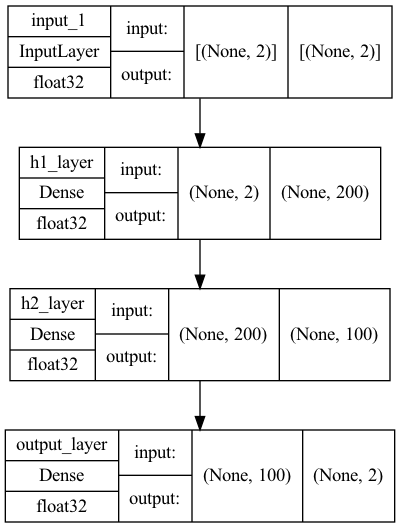

In [9]:
#This is an alternate way of displaying your model
#It requires you to install pydot, pydot plus and graphviz
#In your instance type these two commands:
# pip install pydot
# sudo apt-get install graphviz
#Some of those may already be part of the anaconda package installed on your GCP instance

#Try adding show_shapes=True and/or show_dtype=True as args to plot_model
plot_model(model, show_shapes=True, show_dtype=True)

[Return to Top](#top)
<a id = 'trainModel'></a>
### B4. Training a model

#### Define the dataset

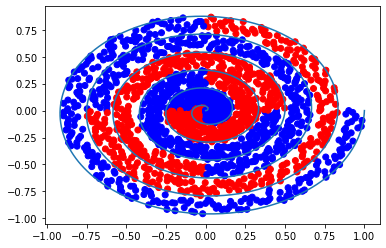

In [10]:
# Let's look at some data and labels:

import matplotlib.pyplot as plt
import numpy as np
nrotate =  6
size = 2040
theta = np.linspace(start = 0, stop = nrotate * 2 * np.pi, num = size)
len(theta)
r = 1/(nrotate * 2 * np.pi) * theta
x = r * np.cos(theta)
y = r * np.sin(theta)
# Toggle the below line to see the dividing line between groups
plt.plot(x, y)
# thickness = 1/(nrotate * 2 * np.pi) * 2 pi = 1 / nrotate
1 / nrotate * np.random.uniform(size = 100)
eps = 0.8
nparts = 4
colors = []
for i in range(nparts):
    colors.extend(['r']*int(size / (2*nparts)) + ['b']*int(size / (2*nparts)))
labels = ['r']*int(size/nparts) + ['b']*int(size/nparts)+['r']*int(size/nparts) + ['b']*int(size/nparts)
rjitter = r - eps / nrotate * np.random.uniform(size = size)
xjitter = rjitter*np.cos(theta)
yjitter = rjitter*np.sin(theta)
plt.scatter(xjitter, yjitter, color = colors)

In [11]:
from sklearn.model_selection import train_test_split
# Convert our data to numpy arrays with correct shapes for our model input, output
datain = np.transpose(np.vstack([x,y]))
labels = np.array([1 if color=='b' else 0 for color in colors]).reshape([-1,1])

# Create training, eval split
train_input, test_input, train_labels, test_labels = train_test_split(datain, labels, test_size = 0.2, 
                                                         random_state = 41,
                                                         shuffle = True)
# Train the model using our training input, labels
## the validation_split arguments states that 20% of the training data is to be used
## ...as dev data.
model.fit(train_input, train_labels, batch_size = 400, validation_split=0.2, epochs = 300)

Epoch 1/300
4/4 [==============================] - 0s 41ms/step - loss: 0.6853 - sparse_categorical_accuracy: 0.5579 - val_loss: 0.6859 - val_sparse_categorical_accuracy: 0.5413
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 0.6694 - sparse_categorical_accuracy: 0.6008 - val_loss: 0.6822 - val_sparse_categorical_accuracy: 0.5657
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6589 - sparse_categorical_accuracy: 0.6598 - val_loss: 0.6774 - val_sparse_categorical_accuracy: 0.6391
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6507 - sparse_categorical_accuracy: 0.6789 - val_loss: 0.6743 - val_sparse_categorical_accuracy: 0.6269
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6428 - sparse_categorical_accuracy: 0.6751 - val_loss: 0.6719 - val_sparse_categorical_accuracy: 0.6239
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 0.6368 - sparse_categorical_accuracy: 0.682

In [12]:
# Evaluate the data with our test_input, test_labels
model.evaluate(test_input, test_labels)

13/13 [==============================] - 0s 657us/step - loss: 0.1954 - sparse_categorical_accuracy: 0.9485


[0.1953589916229248, 0.9485294222831726]

[Return to Top](#top)
<a id = 'saveModel'></a>
### B5. Saving a model

In [13]:
# Saving the model
model.save("./keras_qs_model")

2022-02-11 08:27:25.462023: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./keras_qs_model/assets


[Return to Top](#top)
<a id = 'reloadModel'></a>
### B6. Reloading a model

In [14]:
# Ensure that reloaded model evaluates to same score as when we saved it originally.
model2 = keras.models.load_model("./keras_qs_model")
model2.evaluate(train_input, train_labels)

51/51 [==============================] - 0s 669us/step - loss: 0.1683 - sparse_categorical_accuracy: 0.9516


[0.16833636164665222, 0.9515931606292725]

[Return to Top](#top)
<a id = 'functionWrapper'></a>
## C. Defining your model inside a function to add flexibility

In [ ]:
# If you want to re-run your model with different settings and hyper-parameters there's a good chance you'll benefit by using a class definition.

# Define parameters in a dictionary
modelparams = dict(
    layers = ( (200, 'relu'), (100, 'relu') ), 
    n_classes = 2, # number of output classes -- 2 for binary
    learning_rate = 0.01, 
    output_activation = "sigmoid",
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["sparse_categorical_accuracy"]
)


def basic_km(**kwargs):
    layers = kwargs.get('layers', ((10, 'relu')) ) 
    n_classes = kwargs.get('n_classes', 2)
    learning_rate = kwargs.get('learning_rate', 0.01)
    output_activation = kwargs.get('output_activation', "sigmoid")
    optimizer = kwargs.get('optimizer', "adam")
    loss = kwargs.get('loss', "categorical_crossentropy")
    metrics = kwargs.get('metrics', ["accuracy"])
    
    num_layers = len(layers)
    
    graph = []
    # Define input shape
    graph.append(keras.Input(shape=(2,)))
    # Add hidden layers
    for i, layer in enumerate(layers):
        graph.append(keras.layers.Dense(layer[0], activation = layer[1], name = "h" + str(i+1) + "layer"   ))
    # Add output layer
    graph.append(keras.layers.Dense(n_classes, activation = output_activation, name="output_layer"))
    
    # Define a sequential model from inputs and outputs of graph
    model = keras.Sequential(graph)
    
    # Compile the model
    model.compile(loss = loss, optimizer = optimizer, metrics = metrics)
    return model

modelFromDef = basic_km(**modelparams)

# Train model 
modelFromDef.fit(train_input, train_labels, batch_size = 400, validation_split=0.2, epochs = 300)    
        